In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
filename = "data/gemm2000_shuffled.txt"
fw = "data/gemm2000_shuffled_timeperf.txt"

fw_std = "data/gemm2000_shuffled_timeperf_std.txt"

times = []
flops = []
sizes = []
perfs = []
with open(filename) as f:
    lines = f.readlines()
    for line in lines:
        sizes.append(float(line.split()[0]))
        times.append(float(line.split()[1]))
        flops.append(float(line.split()[2]))
        

times = np.array(times)
flops = np.array(flops)
sizes = np.array(sizes)
perfs = (flops/times)*1e-9 

with open(fw,"w") as f:
    for s,t,p in zip(sizes,times,perfs):
        wstr = str(s) + "\t" + str(t) + "\t" + str(p) + "\n"
        f.write(wstr)

times_mean = np.mean(times)
times_std = np.std(times)
times = (times-times_mean)/times_std

perfs_mean = np.mean(perfs)
perfs_std = np.std(perfs)
perfs = (perfs-perfs_mean)/perfs_std

with open(fw_std,"w") as f:
    for s,t,p in zip(sizes,times,perfs):
        wstr = str(s) + "\t" + str(t) + "\t" + str(p) + "\n"
        f.write(wstr)

In [6]:
perfs_std, perfs_mean

(23.820358715241372, 96.12746502697733)

In [7]:
times_std, times_mean

(0.04317705590544078, 0.038004152275)

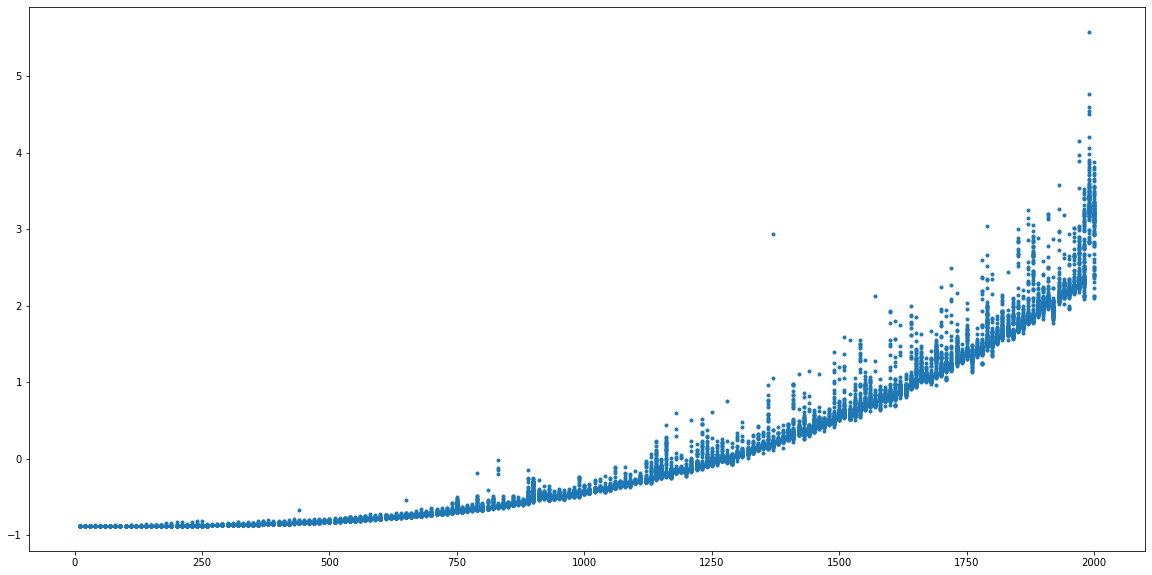

In [5]:
#plt.yscale('log')
plt.plot(sizes,times,'.')

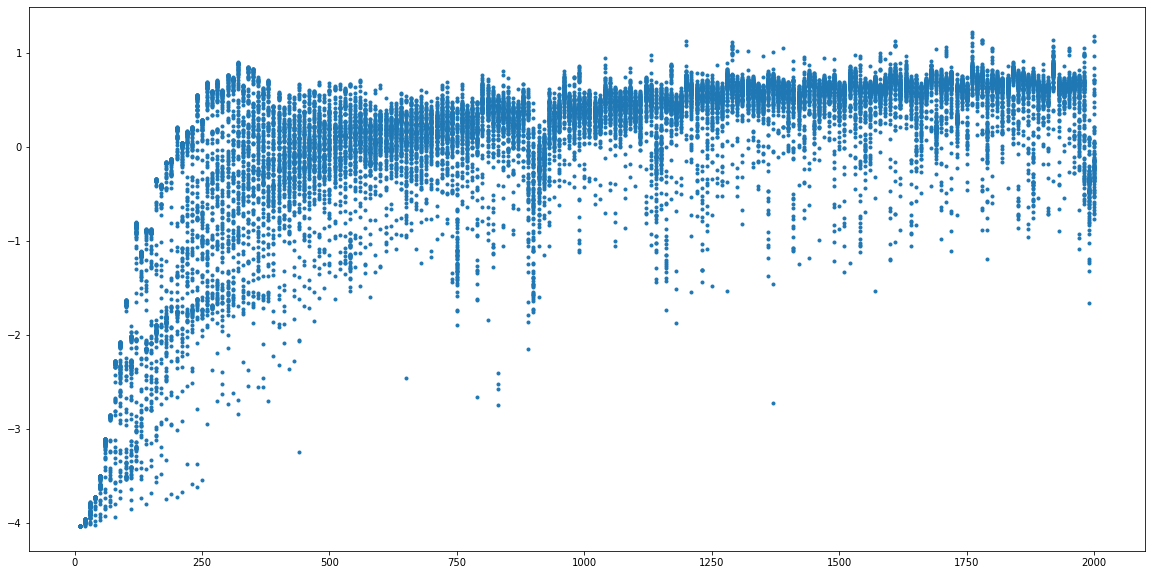

In [46]:
plt.plot(sizes,perfs,'.')

In [12]:
filename = "data/gemm_mnk.txt"
#fw_std = "data/gemm_mnk_std.txt"
fw_std = "data/trash.txt"

times = []
flops = []
m = []
n = []
k = []
perfs = []

with open(filename) as f:
    lines = f.readlines()
    for line in lines:
        m.append(float(line.split()[0]))
        n.append(float(line.split()[1]))
        k.append(float(line.split()[2]))
        times.append(float(line.split()[3]))
        flops.append(float(line.split()[4]))
        

times = np.array(times)
flops = np.array(flops)
m = np.array(m)
n = np.array(n)
k = np.array(k)
#flop_bytes = flops/(1.1*m*n + 1.2*n*k + 1.3*m*k)
flop_bytes = flops/(m*n + n*k + m*k)
perfs = (flops/times)*1e-9 


times_mean = np.mean(times)
times_std = np.std(times)
times = (times-times_mean)/times_std

perfs_mean = np.mean(perfs)
perfs_std = np.std(perfs)
perfs = (perfs-perfs_mean)/perfs_std

with open(fw_std,"w") as f:
    for m,n,k,b,t,p in zip(m,n,k,flop_bytes,times,perfs):
        wstr = str(m) + "\t" + \
                str(n) + "\t" +\
                str(k) + "\t" +\
                str(b) + "\t" +\
                str(t) + "\t" +\
                str(p) + "\n"
        f.write(wstr)

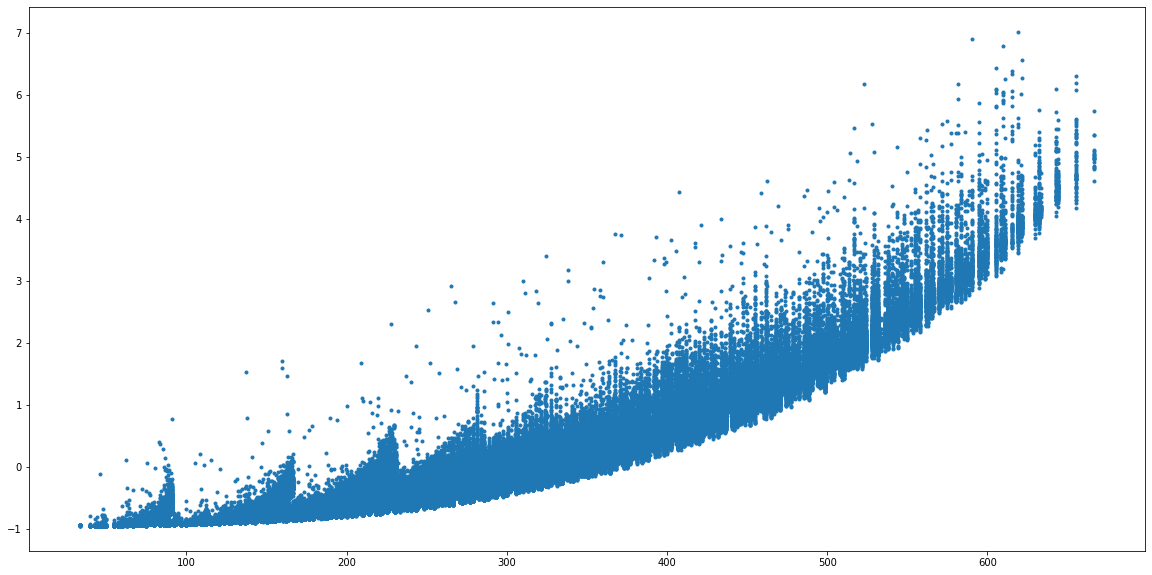

In [13]:
plt.plot(flop_bytes,times,'.')

In [9]:
perfs_std, perfs_mean

(20.44765391998221, 87.79658425316)

In [10]:
times_std, times_mean

(0.0031721245112745983, 0.00304163517125)